ARIMA - Autoregressive Integrated Moving average

In [ ]:
from google.colab import files
s=files.upload()

Saving Pizza_Sale.csv to Pizza_Sale (1).csv


# pizza sales dataset

In [ ]:
piz_sales= pd.read_csv('Pizza_Sale.csv')
piz_sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
piz_sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
piz_sales.shape

(48620, 12)

In [ ]:
piz_sales.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [ ]:
piz_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
piz_sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,7
pizza_size,0
pizza_category,23


In [ ]:
# removing null values in total price
k=piz_sales['quantity'] * piz_sales['unit_price']
k

,0
0,13.25
1,16.00
2,18.50
3,20.75
4,16.00
...,...
48615,16.75
48616,17.95
48617,12.00
48618,20.25


In [ ]:
piz_sales['total_price']=piz_sales['total_price'].fillna(k)

In [ ]:
piz_sales.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,23


In [ ]:
# remove missing data
piz_sales.dropna(inplace=True)

In [ ]:
piz_sales.shape

(48561, 12)

In [ ]:
# checking for duplicates
piz_sales.duplicated().sum()

0

In [ ]:
# no null values
piz_sales.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


<Axes: >

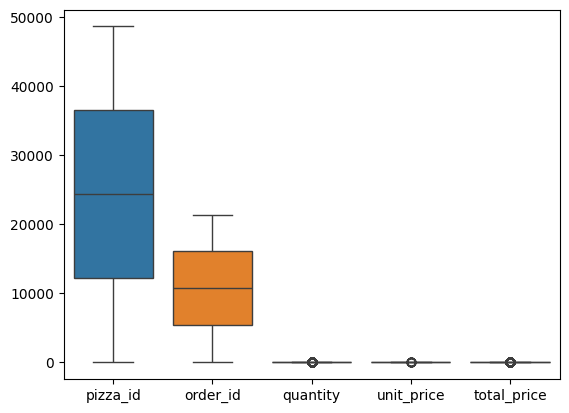

In [ ]:
# to check outliers only for numeric data
sns.boxplot(data=piz_sales)

In [ ]:
# changing date format to yyyy-mm-dd
def convert_date(date):
  for dt in ('%d-%m-%Y', '%d/%m/%Y'):
    # exception handling - catch the errors , try, except, raise
    try:
      return pd.to_datetime(date, format=dt)
    except ValueError:
      pass # future updates
  raise ValueError(f'Invalid date format  {date}')


In [ ]:
piz_sales['order_date'] = piz_sales['order_date'].apply(convert_date)
piz_sales['order_date'].head()

,order_date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01


In [ ]:
piz_sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
piz_sales.dtypes

,0
pizza_id,int64
order_id,int64
pizza_name_id,object
quantity,int64
order_date,datetime64[ns]
order_time,object
unit_price,float64
total_price,float64
pizza_size,object
pizza_category,object


In [ ]:
# Feature Selection
piz_sales = piz_sales[['order_date', 'pizza_name', 'quantity']]
piz_sales

,order_date,pizza_name,quantity
0,2015-01-01,The Hawaiian Pizza,1
1,2015-01-01,The Classic Deluxe Pizza,1
2,2015-01-01,The Five Cheese Pizza,1
3,2015-01-01,The Italian Supreme Pizza,1
4,2015-01-01,The Mexicana Pizza,1
...,...,...,...
48615,2015-12-31,The Chicken Alfredo Pizza,1
48616,2015-12-31,The Four Cheese Pizza,1
48617,2015-12-31,The Napolitana Pizza,1
48618,2015-12-31,The Mexicana Pizza,1


# Analyse sales trends

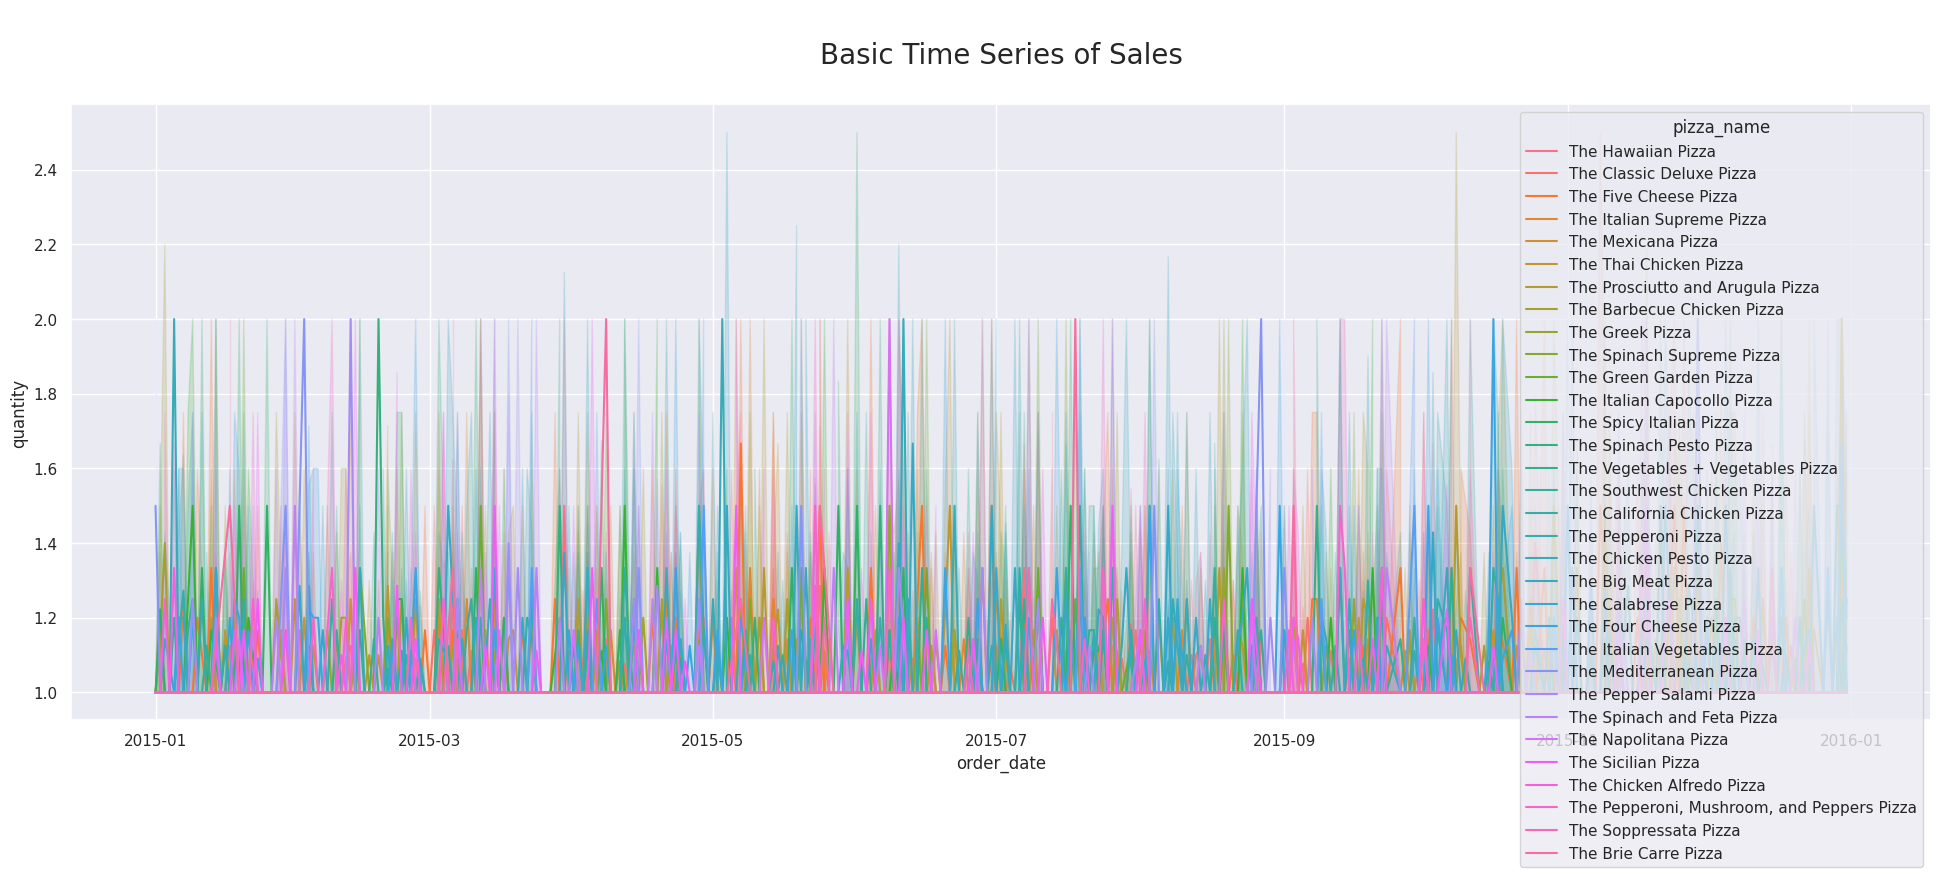

In [ ]:
sns.set(rc={'figure.figsize':(24,8)}) # rc overwrites the default setting
ax=sns.lineplot(data=piz_sales,x='order_date',y='quantity',hue='pizza_name')
ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

In [ ]:
# Group by order date and sum of quantity
sales_trend = piz_sales.groupby('order_date')['quantity'].sum()


In [ ]:
sales_trend

,quantity
order_date,
2015-01-01,156
2015-01-02,160
2015-01-03,143
2015-01-04,92
2015-01-05,106
...,...
2015-12-27,89
2015-12-28,102
2015-12-29,80


In [ ]:
sales_trend.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='order_date', length=358, freq=None)

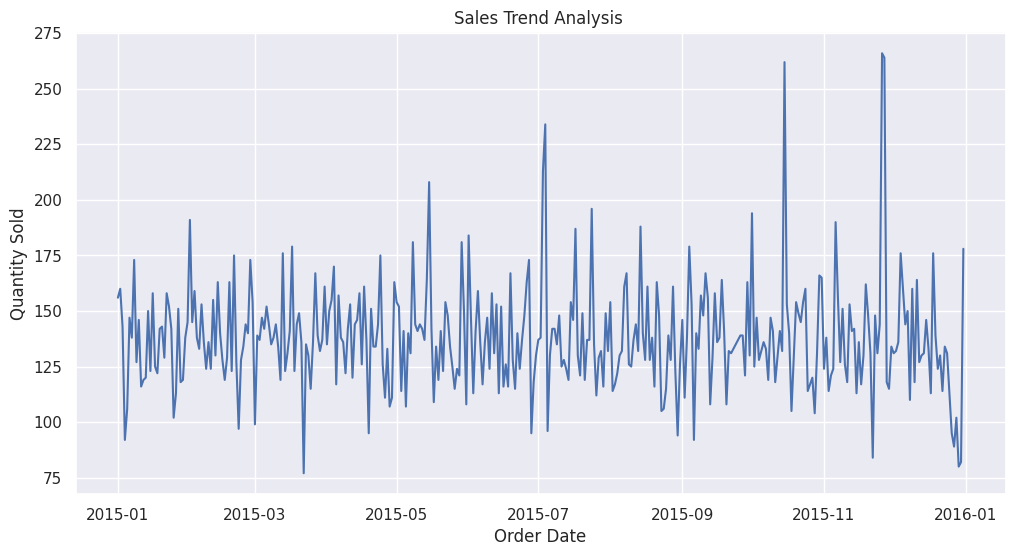

In [ ]:

# visualization
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Sales Trend Analysis ')
plt.grid(True)
plt.show()



## Autocorrelation and partial Autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

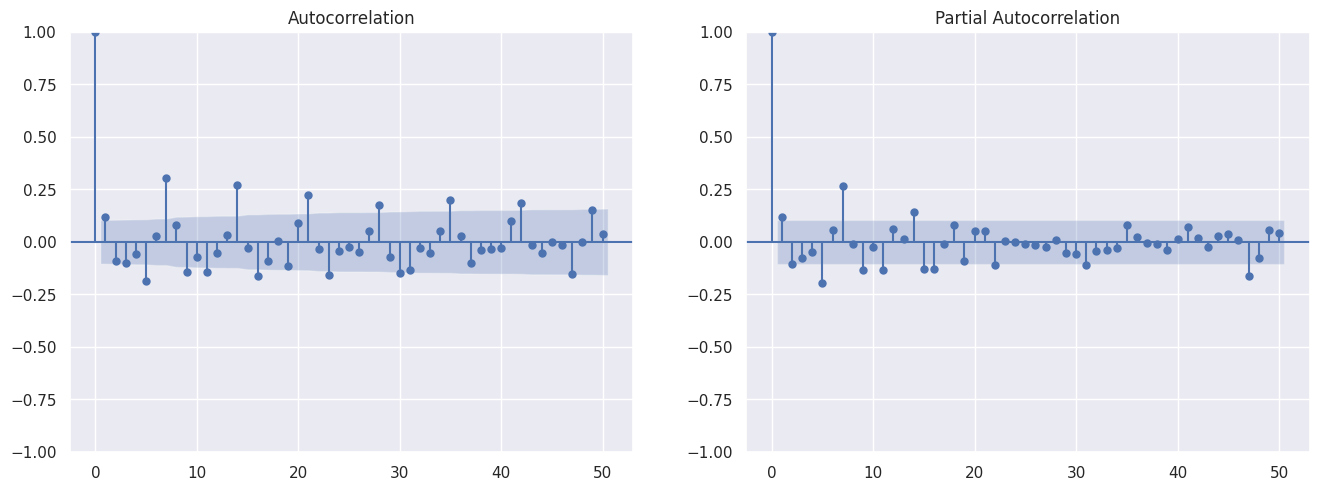

In [ ]:
fig = plt.figure(figsize=(16,12))

# auto correlation function - identify how values at previous time steps are related to current values.
ax1 = fig.add_subplot(221)  # 2 row, 2 columns, 1st subplot
fig = plot_acf(sales_trend, lags=50, ax=ax1) # lags - xaxis

# partial auto correlation -eliminating the influence of intermediate lags.
ax2 = fig.add_subplot(222) # 2nd subplot
fig = plot_pacf(sales_trend, lags=50, ax=ax2)
#plt.tight_layout()

The adfuller function from statsmodels.tsa.stattools is used to perform the Augmented Dickey-Fuller (ADF) test:

Hypothesis Testing

If the ADF Statistic is less than the critical value and the p-value is small (e.g., < 0.05), the null hypothesis of a unit root can be rejected, and you can conclude that the series is likely stationary.

If the p-value is large, you fail to reject the null hypothesis, suggesting the series may be non-stationary.

Data points are often non-stationary or have means, variances, and covariances that change over time.

Non-stationary behaviors can be trends, cycles

In [ ]:
# tsa - time series analysis
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(sales_trend)

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value: %f' % adf_result[1])

for key, value in adf_result[4].items():
    print('\nCRITICAL VALUES:')
    print(f'   {key}, {value}')

if adf_result[1] <= 0.05:
    print('\n we reject the null hypothesis, The series is stationary - mean,var doesnt change over time')
else:
    print('\n The series is not stationary')

ADF Statistic: -5.204857079340922
p-value: 0.000009

CRITICAL VALUES:
   1%, -3.4496162602188187

CRITICAL VALUES:
   5%, -2.870028369720798

CRITICAL VALUES:
   10%, -2.5712922615505627

we reject the null hypothesis, The series is stationary - mean,var doesnt change over time


ARIMA -  (AutoRegressive Integrated Moving Average) is a widely used statistical model for forecasting time series data

The three parameters you set (p, d, q) define the model:

p: The number of lag observations (past values).

d: The number of times the data needs to be differenced to make it stationary.

q: The size of the moving average window.
In your case, you have chosen the parameters as (1, 1, 0), which means:

1 lag observation (p=1)

1 differencing to achieve stationarity (d=1)

0 moving average terms (q=0)


P = 1

Q = 1

D = 0

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
sales_summary = piz_sales.groupby(['order_date', 'pizza_name']).sum().reset_index()
sales_summary

,order_date,pizza_name,quantity
0,2015-01-01,The Barbecue Chicken Pizza,11
1,2015-01-01,The Big Meat Pizza,5
2,2015-01-01,The Calabrese Pizza,1
3,2015-01-01,The California Chicken Pizza,4
4,2015-01-01,The Chicken Alfredo Pizza,2
...,...,...,...
11025,2015-12-31,The Spinach Pesto Pizza,5
11026,2015-12-31,The Spinach Supreme Pizza,2
11027,2015-12-31,The Spinach and Feta Pizza,5
11028,2015-12-31,The Thai Chicken Pizza,3


In [ ]:
# reshape data for time series modeling
sales_pivot = sales_summary.pivot(index='order_date', columns='pizza_name', values='quantity').fillna(0)
sales_pivot

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,6.0,5.0,...,4.0,4.0,0.0,7.0,5.0,2.0,5.0,2.0,7.0,3.0
2015-01-02,8.0,8.0,0.0,0.0,5.0,1.0,2.0,6.0,6.0,3.0,...,4.0,6.0,4.0,6.0,11.0,2.0,7.0,4.0,9.0,5.0
2015-01-03,7.0,8.0,0.0,1.0,11.0,5.0,3.0,5.0,4.0,7.0,...,7.0,6.0,1.0,5.0,4.0,3.0,2.0,2.0,9.0,7.0
2015-01-04,9.0,0.0,2.0,2.0,5.0,4.0,1.0,4.0,2.0,4.0,...,4.0,3.0,0.0,1.0,4.0,3.0,4.0,3.0,5.0,1.0
2015-01-05,2.0,3.0,2.0,0.0,6.0,8.0,2.0,9.0,5.0,4.0,...,2.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,4.0,5.0,1.0,1.0,3.0,0.0,3.0,8.0,2.0,4.0,...,1.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,5.0,9.0
2015-12-28,2.0,3.0,1.0,1.0,5.0,2.0,3.0,9.0,2.0,4.0,...,5.0,4.0,5.0,3.0,2.0,2.0,2.0,3.0,6.0,3.0
2015-12-29,4.0,6.0,1.0,2.0,6.0,1.0,1.0,3.0,3.0,3.0,...,3.0,2.0,3.0,1.0,3.0,4.0,0.0,1.0,5.0,1.0


In [ ]:
# split train test data - weekly
train_data = sales_pivot[:-7]
test_data = sales_pivot[-7:]

In [ ]:
train_data

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,6.0,5.0,...,4.0,4.0,0.0,7.0,5.0,2.0,5.0,2.0,7.0,3.0
2015-01-02,8.0,8.0,0.0,0.0,5.0,1.0,2.0,6.0,6.0,3.0,...,4.0,6.0,4.0,6.0,11.0,2.0,7.0,4.0,9.0,5.0
2015-01-03,7.0,8.0,0.0,1.0,11.0,5.0,3.0,5.0,4.0,7.0,...,7.0,6.0,1.0,5.0,4.0,3.0,2.0,2.0,9.0,7.0
2015-01-04,9.0,0.0,2.0,2.0,5.0,4.0,1.0,4.0,2.0,4.0,...,4.0,3.0,0.0,1.0,4.0,3.0,4.0,3.0,5.0,1.0
2015-01-05,2.0,3.0,2.0,0.0,6.0,8.0,2.0,9.0,5.0,4.0,...,2.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-19,4.0,6.0,2.0,3.0,9.0,2.0,2.0,6.0,4.0,9.0,...,4.0,8.0,2.0,3.0,6.0,4.0,1.0,4.0,11.0,4.0
2015-12-20,12.0,6.0,0.0,1.0,7.0,3.0,5.0,7.0,1.0,2.0,...,5.0,2.0,0.0,2.0,2.0,1.0,3.0,6.0,5.0,4.0
2015-12-21,7.0,7.0,1.0,5.0,6.0,4.0,1.0,8.0,1.0,5.0,...,3.0,5.0,2.0,6.0,2.0,2.0,1.0,3.0,8.0,2.0


In [ ]:
test_data

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-12-24,4.0,8.0,0.0,3.0,6.0,2.0,3.0,10.0,5.0,5.0,...,4.0,6.0,0.0,6.0,4.0,2.0,3.0,6.0,7.0,3.0
2015-12-26,5.0,5.0,1.0,3.0,3.0,1.0,1.0,4.0,2.0,7.0,...,3.0,2.0,0.0,2.0,2.0,1.0,2.0,3.0,10.0,3.0
2015-12-27,4.0,5.0,1.0,1.0,3.0,0.0,3.0,8.0,2.0,4.0,...,1.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,5.0,9.0
2015-12-28,2.0,3.0,1.0,1.0,5.0,2.0,3.0,9.0,2.0,4.0,...,5.0,4.0,5.0,3.0,2.0,2.0,2.0,3.0,6.0,3.0
2015-12-29,4.0,6.0,1.0,2.0,6.0,1.0,1.0,3.0,3.0,3.0,...,3.0,2.0,3.0,1.0,3.0,4.0,0.0,1.0,5.0,1.0
2015-12-30,6.0,3.0,0.0,0.0,7.0,1.0,0.0,4.0,1.0,5.0,...,2.0,0.0,1.0,7.0,2.0,2.0,2.0,1.0,3.0,5.0
2015-12-31,10.0,6.0,2.0,3.0,7.0,4.0,4.0,10.0,5.0,9.0,...,5.0,5.0,3.0,5.0,9.0,5.0,2.0,5.0,3.0,10.0


In [ ]:

arima_models = {}

for pizza_name in train_data.columns:
  try:
    model = ARIMA(train_data[pizza_name], order=(1,1,  0))
    model_fit = model.fit()
    arima_models[pizza_name] = model_fit
  except:
    print(f'ARIMA model for {pizza_name} failed to fit')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# weekly predictions
pred_days = 7
pred_arima = {}

for pizza_name, model in arima_models.items():
  pred_arima[pizza_name] = model.predict(start=len(sales_pivot), end=len(sales_pivot) + pred_days-1 )


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa

In [ ]:
pred_arima

{'The Barbecue Chicken Pizza': 358    5.322570
 359    5.317371
 360    5.320055
 361    5.318670
 362    5.319385
 363    5.319016
 364    5.319206
 Name: predicted_mean, dtype: float64,
 'The Big Meat Pizza': 358    7.683971
 359    7.689955
 360    7.686818
 361    7.688463
 362    7.687600
 363    7.688052
 364    7.687815
 Name: predicted_mean, dtype: float64,
 'The Brie Carre Pizza': 358    1.286342
 359    1.274841
 360    1.281324
 361    1.277669
 362    1.279730
 363    1.278568
 364    1.279223
 Name: predicted_mean, dtype: float64,
 'The Calabrese Pizza': 358    1.698097
 359    1.706232
 360    1.701819
 361    1.704213
 362    1.702915
 363    1.703619
 364    1.703237
 Name: predicted_mean, dtype: float64,
 'The California Chicken Pizza': 358    4.632294
 359    4.634278
 360    4.633358
 361    4.633785
 362    4.633587
 363    4.633678
 364    4.633636
 Name: predicted_mean, dtype: float64,
 'The Chicken Alfredo Pizza': 358    2.660555
 359    2.664179
 360    2.662382

In [ ]:
pred_df = pd.DataFrame(pred_arima)
pred_df

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
358,5.322570,7.683971,1.286342,1.698097,4.632294,2.660555,2.316249,6.317630,3.672373,2.698899,...,3.682050,7.041980,2.0,4.686334,5.619136,2.324092,0.330425,3.686037,7.670514,4.063885
359,5.317371,7.689955,1.274841,1.706232,4.634278,2.664179,2.317246,6.311849,3.670754,2.718523,...,3.680979,7.032787,2.0,4.685442,5.620633,2.325484,0.332249,3.685133,7.668761,4.061389
360,5.320055,7.686818,1.281324,1.701819,4.633358,2.662382,2.316784,6.314868,3.671547,2.708460,...,3.681480,7.037261,2.0,4.685851,5.619960,2.324813,0.331344,3.685548,7.669627,4.062524
361,5.318670,7.688463,1.277669,1.704213,4.633785,2.663273,2.316998,6.313291,3.671158,2.713621,...,3.681246,7.035084,2.0,4.685664,5.620263,2.325136,0.331793,3.685357,7.669199,4.062008
362,5.319385,7.687600,1.279730,1.702915,4.633587,2.662831,2.316899,6.314115,3.671348,2.710974,...,3.681355,7.036143,2.0,4.685750,5.620127,2.324981,0.331570,3.685445,7.669411,4.062243
363,5.319016,7.688052,1.278568,1.703619,4.633678,2.663051,2.316945,6.313685,3.671255,2.712331,...,3.681304,7.035628,2.0,4.685710,5.620188,2.325056,0.331681,3.685405,7.669306,4.062136
364,5.319206,7.687815,1.279223,1.703237,4.633636,2.662942,2.316923,6.313909,3.671301,2.711635,...,3.681328,7.035879,2.0,4.685728,5.620161,2.325020,0.331626,3.685423,7.669358,4.062184


In [ ]:
# date index
pred_df.index = pd.date_range(start=sales_pivot.index[-1], periods=pred_days, freq='D')
pred_df.index

DatetimeIndex(['2015-12-31', '2016-01-01', '2016-01-02', '2016-01-03',
               '2016-01-04', '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
test_data

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-12-24,4.0,8.0,0.0,3.0,6.0,2.0,3.0,10.0,5.0,5.0,...,4.0,6.0,0.0,6.0,4.0,2.0,3.0,6.0,7.0,3.0
2015-12-26,5.0,5.0,1.0,3.0,3.0,1.0,1.0,4.0,2.0,7.0,...,3.0,2.0,0.0,2.0,2.0,1.0,2.0,3.0,10.0,3.0
2015-12-27,4.0,5.0,1.0,1.0,3.0,0.0,3.0,8.0,2.0,4.0,...,1.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,5.0,9.0
2015-12-28,2.0,3.0,1.0,1.0,5.0,2.0,3.0,9.0,2.0,4.0,...,5.0,4.0,5.0,3.0,2.0,2.0,2.0,3.0,6.0,3.0
2015-12-29,4.0,6.0,1.0,2.0,6.0,1.0,1.0,3.0,3.0,3.0,...,3.0,2.0,3.0,1.0,3.0,4.0,0.0,1.0,5.0,1.0
2015-12-30,6.0,3.0,0.0,0.0,7.0,1.0,0.0,4.0,1.0,5.0,...,2.0,0.0,1.0,7.0,2.0,2.0,2.0,1.0,3.0,5.0
2015-12-31,10.0,6.0,2.0,3.0,7.0,4.0,4.0,10.0,5.0,9.0,...,5.0,5.0,3.0,5.0,9.0,5.0,2.0,5.0,3.0,10.0


In [ ]:
pred_df

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2015-12-31,5.322570,7.683971,1.286342,1.698097,4.632294,2.660555,2.316249,6.317630,3.672373,2.698899,...,3.682050,7.041980,2.0,4.686334,5.619136,2.324092,0.330425,3.686037,7.670514,4.063885
2016-01-01,5.317371,7.689955,1.274841,1.706232,4.634278,2.664179,2.317246,6.311849,3.670754,2.718523,...,3.680979,7.032787,2.0,4.685442,5.620633,2.325484,0.332249,3.685133,7.668761,4.061389
2016-01-02,5.320055,7.686818,1.281324,1.701819,4.633358,2.662382,2.316784,6.314868,3.671547,2.708460,...,3.681480,7.037261,2.0,4.685851,5.619960,2.324813,0.331344,3.685548,7.669627,4.062524
2016-01-03,5.318670,7.688463,1.277669,1.704213,4.633785,2.663273,2.316998,6.313291,3.671158,2.713621,...,3.681246,7.035084,2.0,4.685664,5.620263,2.325136,0.331793,3.685357,7.669199,4.062008
2016-01-04,5.319385,7.687600,1.279730,1.702915,4.633587,2.662831,2.316899,6.314115,3.671348,2.710974,...,3.681355,7.036143,2.0,4.685750,5.620127,2.324981,0.331570,3.685445,7.669411,4.062243
2016-01-05,5.319016,7.688052,1.278568,1.703619,4.633678,2.663051,2.316945,6.313685,3.671255,2.712331,...,3.681304,7.035628,2.0,4.685710,5.620188,2.325056,0.331681,3.685405,7.669306,4.062136
2016-01-06,5.319206,7.687815,1.279223,1.703237,4.633636,2.662942,2.316923,6.313909,3.671301,2.711635,...,3.681328,7.035879,2.0,4.685728,5.620161,2.325020,0.331626,3.685423,7.669358,4.062184


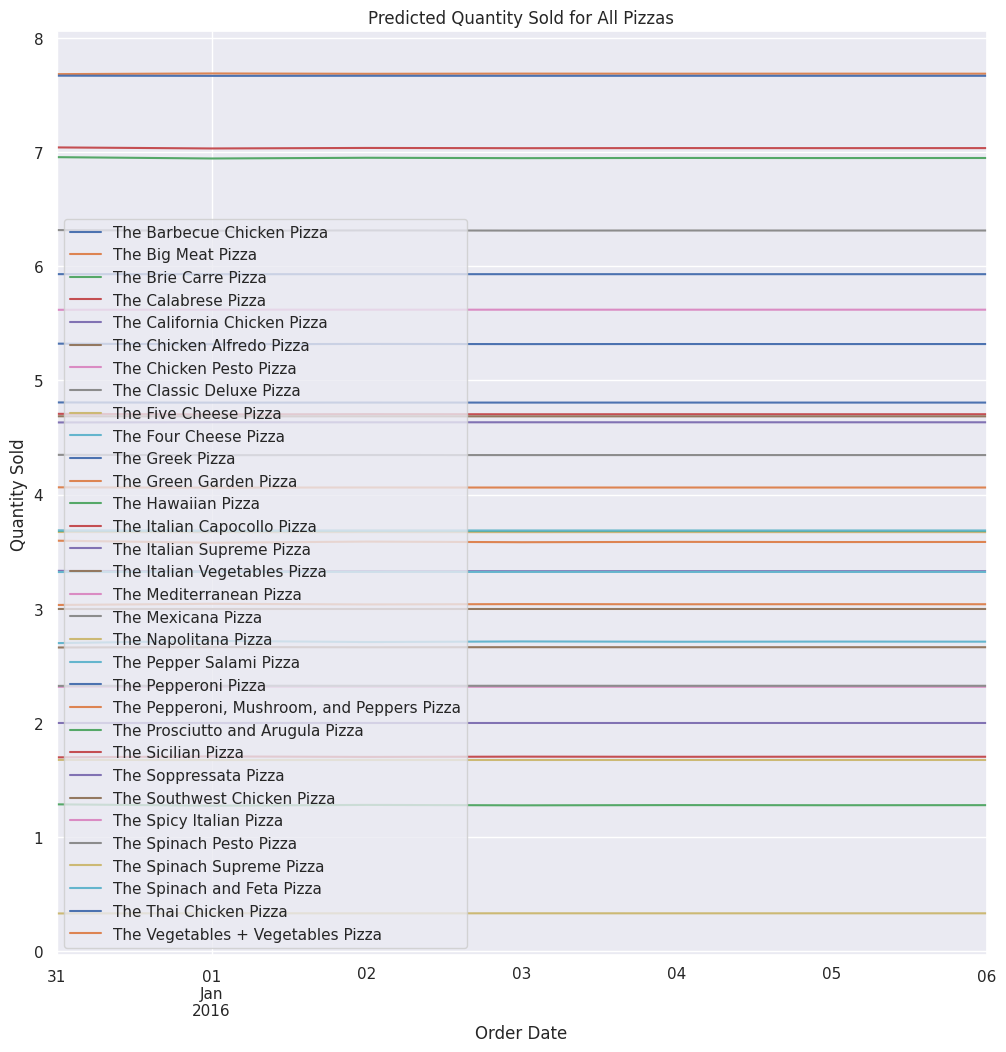

In [ ]:
pred_df.plot(figsize=(12, 12))
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Predicted Quantity Sold for All Pizzas')
plt.show()

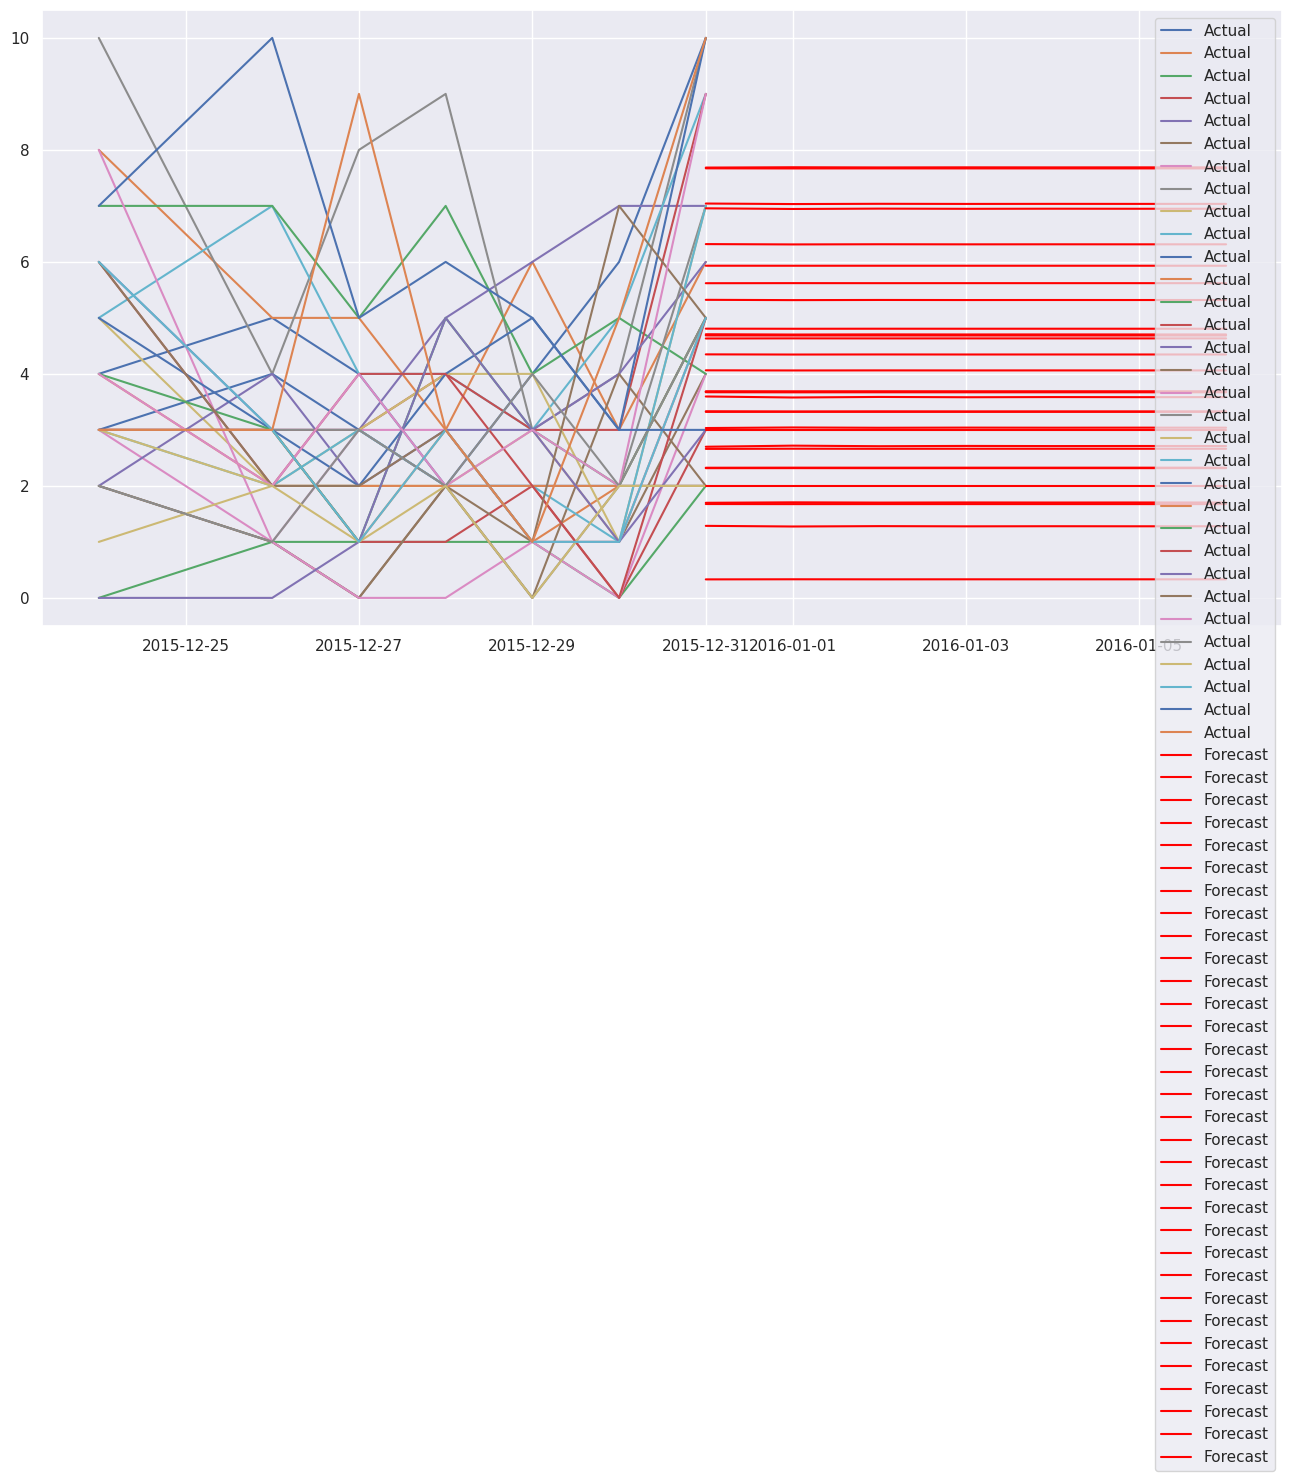

In [ ]:
plt.plot(figsize=(24, 24))
plt.plot(test_data, label='Actual')
plt.plot(pred_df, label='Forecast', color='red')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mae = mean_absolute_error(test_data, pred_df)
mse = mean_squared_error(test_data, pred_df)
rmse = np.sqrt(mse)

print(f'ARIMA MAE: {mae}')
print(f'ARIMA MSE: {mse}')
print(f'ARIMA RMSE: {rmse}')

ARIMA MAE: 1.889545507847059
ARIMA MSE: 5.2294737461642
ARIMA RMSE: 2.2868042649435916


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:

# Calculate MAPE
mape = mean_absolute_percentage_error(test_data, pred_df) * 100
print("MAPE:", mape, "%")

MAPE: 7.704985782726014e+16 %
